# 성능 체크
-> Kaggle내 코드를 그대로 따라했을 때의 -> 이후 이거 기준 성장  
https://www.kaggle.com/amneves/quick-draw-keras-cnn-model

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy

import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import keras.backend as K 
from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.utils import np_utils
from keras.models import Sequential
from keras.models import load_model

from keras.layers import BatchNormalization, Conv1D, LSTM, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.models import Model

from keras.callbacks import ReduceLROnPlateau
from keras.applications.mobilenet import MobileNet, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

import ast
import os
import cv2
from collections import Counter

Using TensorFlow backend.


# ==============================

In [2]:
path_dir = "E:/경희대학교/2019_2/데이터분석캡스톤디자인/quick_draw/quickdraw-doodle-recognition/top10/"
file_lst = os.listdir(path_dir)

## 10개 파일 중 50,000개씩의 데이터 사용

In [19]:
# all_data = pd.DataFrame()
# for i in file_lst:
#     print(i)
#     tmp = pd.read_csv(path_dir + i)
#     tmp = tmp[tmp["recognized"] == True]
#     ttmp = tmp.iloc[:50000]
#     all_data = pd.concat([all_data,ttmp],axis = 0)

airplane.csv
bear.csv
butterfly.csv
cat.csv
circle.csv
cloud.csv
dog.csv
door.csv
mouse.csv
star.csv


In [5]:
all_data =pd.read_csv("./true_split_data_1224/dataset_1.csv")

In [6]:
all_data.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[63, 59, 53, 33, 29, 39, 65, 73, 72, 66], [3...",5219658900701184,True,2017-01-27 12:47:13.868000,wine bottle
1,US,"[[[45, 44, 18, 7, 0, 13, 36, 58, 77, 102, 106,...",5344588942278656,True,2017-03-19 19:39:31.420990,wine bottle
2,CA,"[[[105, 80, 73, 73, 77, 94, 102], [32, 29, 33,...",4617064918548480,True,2017-03-05 22:50:38.920360,wine bottle
3,JP,"[[[4, 0, 5, 12, 41, 50, 55, 59, 105, 110, 111,...",6571431754203136,True,2017-03-29 14:30:51.318940,wine bottle
4,US,"[[[75, 72, 85, 96, 98, 95, 78, 74], [7, 40, 42...",5325999203942400,True,2017-01-27 16:17:31.971340,wine bottle


In [7]:
all_data['drawing'] = all_data['drawing'].apply(ast.literal_eval)

# ================================

* ast로 계속 바꿔주지 않으려고 pickle 방식 활용

In [2]:
all_data = pd.read_pickle("new_true_split_data/dataset_1.pkl")

In [3]:
all_data.shape

(500000, 6)

In [4]:
word_lst = list(all_data['word'].unique())

In [5]:
train2, test = train_test_split(all_data, test_size=0.3, shuffle = True,
                                random_state = 42,
                                stratify = all_data["word"])

In [6]:
train2.head()

,countrycode,drawing,key_id,recognized,timestamp,word
4424,US,"[[[11, 16, 3, 0, 16, 30, 75, 87, 95, 96, 93, 8...",5282628892622848,True,2017-01-26 03:08:31.823640,wine bottle
84138,GB,"[[[74, 67, 53, 27, 10, 2, 0, 6, 37, 56, 161, 2...",6094540798689280,True,2017-03-25 07:23:34.504550,pond
390002,US,"[[[29, 81, 143, 179, 186, 182, 105, 90, 48, 25...",6721971112902656,True,2017-03-02 14:02:55.861420,cake
129896,US,"[[[30, 64, 145, 159, 166, 166, 175, 176, 166, ...",5082382782693376,True,2017-03-01 16:15:52.619470,traffic light
336032,CA,"[[[141, 160, 166, 167, 164, 158, 38, 13, 6, 7,...",5870901683814400,True,2017-03-19 09:47:37.955320,sea turtle


In [7]:
Counter(train2["word"])

Counter({'wine bottle': 17500,
         'pond': 17500,
         'cake': 17500,
         'traffic light': 17500,
         'sea turtle': 17500,
         'carrot': 17500,
         'microphone': 17500,
         'snake': 17500,
         'octopus': 17500,
         'mermaid': 17500,
         'chandelier': 17500,
         'dog': 17500,
         'bat': 17500,
         'television': 17500,
         'light bulb': 17500,
         'computer': 17500,
         'pliers': 17500,
         'candle': 17500,
         'monkey': 17500,
         'couch': 17500})

In [8]:
train, valid=  train_test_split(train2, test_size=0.3, shuffle = True, 
                                random_state = 42,
                                stratify = train2["word"])

In [9]:
Counter(all_data["word"])

Counter({'wine bottle': 25000,
         'candle': 25000,
         'computer': 25000,
         'pond': 25000,
         'light bulb': 25000,
         'traffic light': 25000,
         'bat': 25000,
         'carrot': 25000,
         'snake': 25000,
         'dog': 25000,
         'monkey': 25000,
         'television': 25000,
         'microphone': 25000,
         'sea turtle': 25000,
         'couch': 25000,
         'cake': 25000,
         'mermaid': 25000,
         'chandelier': 25000,
         'octopus': 25000,
         'pliers': 25000})

In [10]:
print(train.shape)
print(valid.shape)
print(test.shape)

(245000, 6)
(105000, 6)
(150000, 6)


In [11]:
word_le = LabelEncoder()
word_le.fit(all_data['word'])

LabelEncoder()

In [12]:
word_le.classes_

array(['bat', 'cake', 'candle', 'carrot', 'chandelier', 'computer',
       'couch', 'dog', 'light bulb', 'mermaid', 'microphone', 'monkey',
       'octopus', 'pliers', 'pond', 'sea turtle', 'snake', 'television',
       'traffic light', 'wine bottle'], dtype=object)

### Split

In [13]:
size = 64
word_num = len(word_lst)
BASE_SIZE = 256

#### cv2.line
* img: 선분이 그려질 이미지  
* (x1,y1) 선분의 시작점
* (x2,y2) 선분의 끝점
* color: 색상(0~255)
* thickness

In [14]:
def reshape_draw(rs, size=256, lw=6):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for s in rs:
        for i in range(len(s[0]) - 1):
            _ = cv2.line(img, (s[0][i], s[1][i]), (s[0][i + 1], s[1][i + 1]), 255, lw)
#             print(_)

    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img

In [15]:
def drawing_make_array(df, size = size, lw = 6):
    x = np.zeros((len(df),size,size))
    for i, rs in enumerate(df.drawing.values):
        x[i] = reshape_draw(rs,size=size,lw=lw)
    x = x/255 # 정규화
    x = x.reshape((len(df),size,size,1)).astype(np.float32)
    return x

In [16]:
train_X = drawing_make_array(train, size)
train_y = to_categorical(word_le.transform(train['word'].values))

In [17]:
valid_X = drawing_make_array(valid, size)
valid_y = to_categorical(word_le.transform(valid['word'].values))

In [18]:
test_X = drawing_make_array(test, size)
test_y = to_categorical(word_le.transform(test['word'].values))

In [19]:
train_X.shape

(245000, 64, 64, 1)

## Model

In [29]:
STEPS= 200
batch = 100
epochs = 50

In [21]:
datagen = ImageDataGenerator()

In [22]:
K.clear_session()
base_model = MobileNet(input_shape=(size, size, 1), include_top=False, weights=None, classes=word_num)

In [24]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(word_num, activation='softmax')(x)

In [25]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [26]:
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy',
              metrics=[categorical_crossentropy, categorical_accuracy])


In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 65, 65, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 32, 32, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 32, 32, 32)        128 

In [31]:
check_point = ModelCheckpoint('model2_copy_upgrade_1224.h5', monitor='val_loss', mode='min', save_best_only=True)
reduceRP = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                             factor=0.75, patience=5,
                            mode = 'max',
                            min_delta = 0.005,
                            cooldown=3,
                            verbose = 1)

early = EarlyStopping(monitor="val_categorical_accuracy", 
                      mode="max", 
                      patience=10)

callbacks = [check_point, early,reduceRP]

In [32]:
hist = model.fit_generator(
    datagen.flow(train_X,train_y,batch_size = batch),
    steps_per_epoch = STEPS,
    validation_steps=STEPS, epochs=epochs, verbose=1,
    validation_data=(valid_X, valid_y),
    callbacks = callbacks
)

Epoch 1/50
200/200 [==============================] - 122s 610ms/step - loss: 2.6471 - categorical_crossentropy: 2.6471 - categorical_accuracy: 0.1673 - val_loss: 3.0743 - val_categorical_crossentropy: 3.0743 - val_categorical_accuracy: 0.0500
Epoch 2/50
200/200 [==============================] - 120s 602ms/step - loss: 2.3427 - categorical_crossentropy: 2.3427 - categorical_accuracy: 0.2350 - val_loss: 3.2615 - val_categorical_crossentropy: 3.2615 - val_categorical_accuracy: 0.0500
Epoch 3/50
200/200 [==============================] - 126s 629ms/step - loss: 2.2116 - categorical_crossentropy: 2.2116 - categorical_accuracy: 0.2722 - val_loss: 3.7327 - val_categorical_crossentropy: 3.7327 - val_categorical_accuracy: 0.0500
Epoch 4/50
200/200 [==============================] - 126s 631ms/step - loss: 2.1055 - categorical_crossentropy: 2.1055 - categorical_accuracy: 0.3034 - val_loss: 2.8118 - val_categorical_crossentropy: 2.8118 - val_categorical_accuracy: 0.2143
Epoch 5/50
200/200 [====

200/200 [==============================] - 164s 819ms/step - loss: 0.5715 - categorical_crossentropy: 0.5715 - categorical_accuracy: 0.8298 - val_loss: 0.5082 - val_categorical_crossentropy: 0.5082 - val_categorical_accuracy: 0.8408
Epoch 35/50
200/200 [==============================] - 139s 696ms/step - loss: 0.5376 - categorical_crossentropy: 0.5376 - categorical_accuracy: 0.8395 - val_loss: 0.5286 - val_categorical_crossentropy: 0.5286 - val_categorical_accuracy: 0.8353
Epoch 36/50
200/200 [==============================] - 141s 707ms/step - loss: 0.5309 - categorical_crossentropy: 0.5309 - categorical_accuracy: 0.8393 - val_loss: 0.4797 - val_categorical_crossentropy: 0.4797 - val_categorical_accuracy: 0.8511
Epoch 37/50
200/200 [==============================] - 144s 722ms/step - loss: 0.4953 - categorical_crossentropy: 0.4953 - categorical_accuracy: 0.8472 - val_loss: 0.4672 - val_categorical_crossentropy: 0.4672 - val_categorical_accuracy: 0.8560
Epoch 38/50
200/200 [===========

In [35]:
hist2 = model.fit_generator(
    datagen.flow(train_X,train_y,batch_size = batch),
    steps_per_epoch = STEPS,
    validation_steps=STEPS, epochs=epochs, verbose=1,
    validation_data=(valid_X, valid_y),
    callbacks = callbacks
)

Epoch 1/50
200/200 [==============================] - 126s 631ms/step - loss: 0.3114 - categorical_crossentropy: 0.3114 - categorical_accuracy: 0.9057 - val_loss: 0.3700 - val_categorical_crossentropy: 0.3700 - val_categorical_accuracy: 0.8881
Epoch 2/50
200/200 [==============================] - 136s 679ms/step - loss: 0.3054 - categorical_crossentropy: 0.3054 - categorical_accuracy: 0.9080 - val_loss: 0.3553 - val_categorical_crossentropy: 0.3553 - val_categorical_accuracy: 0.8927
Epoch 3/50
200/200 [==============================] - 137s 686ms/step - loss: 0.3174 - categorical_crossentropy: 0.3174 - categorical_accuracy: 0.9055 - val_loss: 0.3594 - val_categorical_crossentropy: 0.3594 - val_categorical_accuracy: 0.8911
Epoch 4/50
200/200 [==============================] - 138s 689ms/step - loss: 0.3155 - categorical_crossentropy: 0.3155 - categorical_accuracy: 0.9056 - val_loss: 0.3435 - val_categorical_crossentropy: 0.3435 - val_categorical_accuracy: 0.8960
Epoch 5/50
200/200 [====

200/200 [==============================] - 134s 670ms/step - loss: 0.1674 - categorical_crossentropy: 0.1674 - categorical_accuracy: 0.9467 - val_loss: 0.2809 - val_categorical_crossentropy: 0.2809 - val_categorical_accuracy: 0.9204
Epoch 34/50
200/200 [==============================] - 135s 673ms/step - loss: 0.1570 - categorical_crossentropy: 0.1570 - categorical_accuracy: 0.9515 - val_loss: 0.2759 - val_categorical_crossentropy: 0.2759 - val_categorical_accuracy: 0.9211
Epoch 35/50
200/200 [==============================] - 137s 683ms/step - loss: 0.1587 - categorical_crossentropy: 0.1587 - categorical_accuracy: 0.9501 - val_loss: 0.2773 - val_categorical_crossentropy: 0.2773 - val_categorical_accuracy: 0.9205

Epoch 00035: ReduceLROnPlateau reducing learning rate to 3.164062582072802e-05.
Epoch 36/50
200/200 [==============================] - 138s 688ms/step - loss: 0.1554 - categorical_crossentropy: 0.1554 - categorical_accuracy: 0.9521 - val_loss: 0.2787 - val_categorical_crossen

In [38]:
model.compile(optimizer=Adam(lr=1.7797852706280537e-05), loss='categorical_crossentropy',
              metrics=[categorical_accuracy])

In [39]:
check_point = ModelCheckpoint('model2_copy_upgrade_1224_3.h5', monitor='val_loss', mode='min', save_best_only=True)
reduceRP = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                             factor=0.75, patience=5,
                            mode = 'max',
                            min_delta = 0.005,
                            cooldown=3,
                            verbose = 1)

early = EarlyStopping(monitor="val_categorical_accuracy", 
                      mode="max", 
                      patience=10)

callbacks = [check_point, early,reduceRP]

In [40]:
hist3 = model.fit_generator(
    datagen.flow(train_X,train_y,batch_size = batch),
    steps_per_epoch = STEPS,
    validation_steps=STEPS, epochs=20, verbose=1,
    validation_data=(valid_X, valid_y),
    callbacks = callbacks
)

Epoch 1/20
200/200 [==============================] - 153s 765ms/step - loss: 0.0722 - categorical_accuracy: 0.9773 - val_loss: 0.3086 - val_categorical_accuracy: 0.9239
Epoch 2/20
200/200 [==============================] - 158s 791ms/step - loss: 0.0742 - categorical_accuracy: 0.9770 - val_loss: 0.3166 - val_categorical_accuracy: 0.9238
Epoch 3/20
200/200 [==============================] - 160s 799ms/step - loss: 0.0698 - categorical_accuracy: 0.9778 - val_loss: 0.3201 - val_categorical_accuracy: 0.9233
Epoch 4/20
200/200 [==============================] - 140s 701ms/step - loss: 0.0761 - categorical_accuracy: 0.9765 - val_loss: 0.3209 - val_categorical_accuracy: 0.9222
Epoch 5/20
200/200 [==============================] - 155s 777ms/step - loss: 0.0690 - categorical_accuracy: 0.9785 - val_loss: 0.3226 - val_categorical_accuracy: 0.9230
Epoch 6/20
200/200 [==============================] - 153s 765ms/step - loss: 0.0696 - categorical_accuracy: 0.9773 - val_loss: 0.3240 - val_categoric

In [41]:
import winsound as ws

def beepsound():
    freq = 2000    # range : 37 ~ 32767
    dur = 1000     # ms
    ws.Beep(freq, dur) # winsound.Beep(frequency, duration)


In [42]:
print(beepsound())

None


In [40]:
hist.history.keys()

dict_keys(['val_loss', 'val_categorical_crossentropy', 'val_categorical_accuracy', 'loss', 'categorical_crossentropy', 'categorical_accuracy', 'lr'])

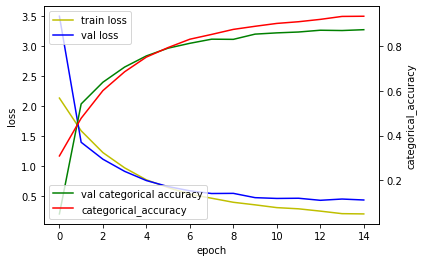

In [41]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'b', label='val loss')

acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(hist.history['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

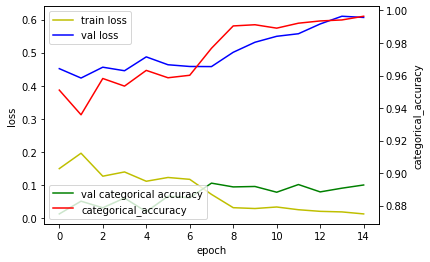

In [42]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'b', label='val loss')

acc_ax.plot(hist2.history['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(hist2.history['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [49]:
all_hist = dict()
all_hist['loss'] = hist.history['loss'] + hist2.history['loss']
all_hist['val_loss'] = hist.history['val_loss'] + hist2.history['val_loss']
all_hist['val_categorical_accuracy'] = hist.history['val_categorical_accuracy'] + hist2.history['val_categorical_accuracy']
all_hist['categorical_accuracy'] = hist.history['categorical_accuracy'] + hist2.history['categorical_accuracy']

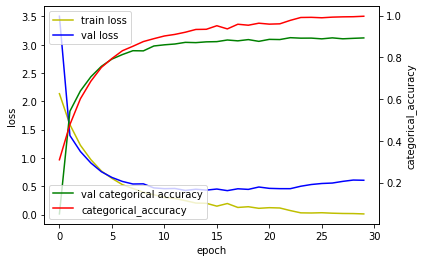

In [50]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(all_hist['loss'], 'y', label='train loss')
loss_ax.plot(all_hist['val_loss'], 'b', label='val loss')

acc_ax.plot(all_hist['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(all_hist['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## Evaluation

In [55]:
model_1 = load_model('model2_copy/model2_copy_origin_1224_1.h5')

In [56]:
model_1.evaluate(test_X, test_y)

150000/150000 [==============================] - 152s 1ms/step


[0.43104013243397077, 0.4310397505760193, 0.8708666563034058]

In [63]:
pred_y1 = model_1.predict(test_X, batch_size= batch)

In [64]:
ppp1 = np.argmax(pred_y1,1)

In [65]:
ttt = np.argmax(test_y,1)

In [67]:
ppp1

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

In [68]:
ttt

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

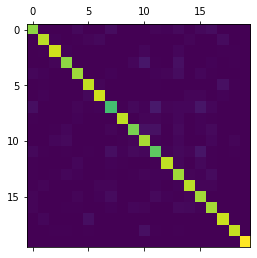

In [69]:
plt.matshow(confusion_matrix(ttt,ppp1))

In [70]:
print(classification_report(ttt, ppp1, 
                            target_names = [x for x in word_le.classes_]))

               precision    recall  f1-score   support

          bat       0.87      0.83      0.85      7500
         cake       0.92      0.90      0.91      7500
       candle       0.93      0.93      0.93      7500
       carrot       0.90      0.83      0.86      7500
   chandelier       0.88      0.85      0.87      7500
     computer       0.90      0.91      0.90      7500
        couch       0.92      0.93      0.92      7500
          dog       0.80      0.70      0.75      7500
   light bulb       0.95      0.90      0.92      7500
      mermaid       0.86      0.80      0.83      7500
   microphone       0.78      0.87      0.82      7500
       monkey       0.76      0.75      0.76      7500
      octopus       0.92      0.90      0.91      7500
       pliers       0.75      0.86      0.80      7500
         pond       0.88      0.89      0.89      7500
   sea turtle       0.77      0.86      0.81      7500
        snake       0.83      0.87      0.85      7500
   televi

In [53]:
model.evaluate(test_X, test_y) #loss, categorical_entropy, categorical_accuracy

150000/150000 [==============================] - 152s 1ms/step


[0.6103923605873312, 0.6103926301002502, 0.8926399946212769]

In [51]:
pred_y = model.predict(test_X, batch_size= batch)

In [57]:
ppp = np.argmax(pred_y,1)

In [58]:
ttt = np.argmax(test_y,1)

In [59]:
ppp

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

In [60]:
ttt

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

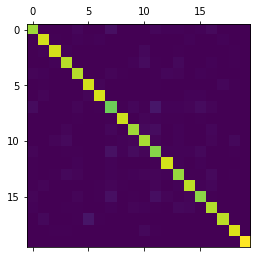

In [61]:
plt.matshow(confusion_matrix(ttt,ppp))

In [62]:
print(classification_report(ttt, ppp, 
                            target_names = [x for x in word_le.classes_]))

               precision    recall  f1-score   support

          bat       0.89      0.85      0.87      7500
         cake       0.91      0.93      0.92      7500
       candle       0.95      0.93      0.94      7500
       carrot       0.90      0.89      0.90      7500
   chandelier       0.88      0.89      0.88      7500
     computer       0.91      0.93      0.92      7500
        couch       0.94      0.94      0.94      7500
          dog       0.78      0.78      0.78      7500
   light bulb       0.94      0.93      0.93      7500
      mermaid       0.88      0.86      0.87      7500
   microphone       0.84      0.87      0.86      7500
       monkey       0.77      0.82      0.80      7500
      octopus       0.91      0.94      0.92      7500
       pliers       0.84      0.84      0.84      7500
         pond       0.89      0.90      0.90      7500
   sea turtle       0.87      0.83      0.85      7500
        snake       0.86      0.89      0.87      7500
   televi

* 이미지 그리기

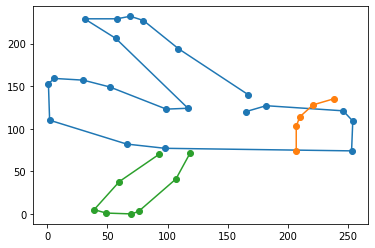

In [122]:
raw_images = list(all_data['drawing'])

k = 0
for i in range(len(raw_images[k])):
    plt.plot(raw_images[k][i][0], raw_images[k][i][1],'o-')
plt.show()

In [171]:
def get_Xy(in_df):
    X = np.stack(in_df['drawing'], 0)
    y = to_categorical(word_encoder.transform(in_df['word'].values))
    return X, y
train_X, train_y = get_Xy(train_df)
valid_X, valid_y = get_Xy(valid_df)
test_X, test_y = get_Xy(test_df)
print(train_X.shape)

NameError: name 'train_df' is not defined

In [108]:

stroke_read_model = Sequential()
stroke_read_model.add(BatchNormalization(input_shape = (None,)))
# filter count and length are taken from the script https://github.com/tensorflow/models/blob/master/tutorials/rnn/quickdraw/train_model.py
stroke_read_model.add(Conv1D(48, (5,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Conv1D(64, (5,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Conv1D(96, (3,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(LSTM(128, return_sequences = True))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(LSTM(128, return_sequences = False))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Dense(512))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Dense(len(word_encoder.classes_), activation = 'softmax'))
stroke_read_model.compile(optimizer = 'adam', 
                          loss = 'categorical_crossentropy', 
                          metrics = ['categorical_accuracy', top_3_accuracy])
stroke_read_model.summary()

ValueError: Axis -1 of input tensor should have a defined dimension but the layer received an input with shape (None, None).